<left><img width=25% src="img/gw_monogram_2c.png"></left>

# Lecture 8: Developing and Evaluating Machine Learning Models

### CS6364/CS4364 Machine Learning

__Sardar Hamidian__<br>The George Washington Universiry

__Armin Mehrabian__<br>The George Washington Universiry

# Announcement

* 

# Practical Considerations When Applying Machine Learning

Suppose you trained an image classifier with 80% accuracy. What's next?

* Add more data?
* Train the algorithm for longer?
* Use a bigger model?
* Add regularization?
* Add new features?

We look at how to prioritize decisions to produce performant ML systems.

# Part 1: Machine Learning Development Workflow

In order to iterate and improve upon machine learning models, practitioners follow a development workflow.

We first define it at a high-level. Afterwards, we will describe each step in more detail.

# Datasets for Model Development

When developing machine learning models, it is customary to work with three datasets:
* __Training set__: Data on which we train our algorithms.
* __Test set__ (Developement set or Validation set): Data used for tuning algorithms.
* __Hold-out set__ (Test set): Data used to evaluate the final performance of the model.

# Model Development Workflow

The typical way in which these datasets are used is:
1. __Training:__ Try a new model and fit it on the training set.

2. __Model Selection__: Estimate performance on the Test set using metrics. Based on results, try a new model idea in step #1.

3. __Evaluation__: Finally, estimate real-world performance on hold-out set.

A few notes about this procedure:
* ML development is a trial-and-error process. You need to try a lot of ideas!
* When starting on a new problem, a first step is to establish train, test, and holdout sets and performance metrics.
* This workflow allows you to iterate very quickly.

# Test and Holdout Sets

* __Test Set__: Its goal is to detect changes in model performance.
* __Holdout Set__: Its goal is confidently estimate real-world performance
* Choosing the best model on the test set over-estimates its peformance. Hence, a clean and untouched holdout set is crucial!

# Review: Data Distribution

In machine learning, we typically assume that data comes from a probability distribution $\mathbb{P}$, which we will call the *data distribution*:

$$ x, y \sim \mathbb{P}. $$

The training set $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$ consists of *independent and identicaly distributed* (IID) samples from $\mathbb{P}$.

# Review: Hold-Out Set

A hold-out set $\dot{\mathcal{D}} = \{(\dot{x^{(i)}}, \dot{y^{(i)}}) \mid i = 1,2,...,n\}$ consists of *independent and identicaly distributed* (IID) samples from $\mathbb{P}$ and is distinct from the training set.

A model that __generalizes__ is accurate on a Holdout set and your Test set.

We present a workflow for developing accurate models that generalize.

# Choosing Test and Holdout Sets

How should one choose the test and holdout set? We highlight two considerations.

__Distributional Consistency__: The test and holdout sets should be from the data distribution we will see in production.

* This is because we want to be optimizing performance in deployment (e.g., classification accuracy on dog images).
* The training data could potentially be from a different distribution (e.g., include other types of animal images).

__Dataset Size__: Test and Holdout datasets need to estimate future performance.

* The classic advice is to save 30\% of data for Test and Holdout set.
* In big data world, 30\% can be too much. Using e.g. 3,000 inputs for testing out of 1M is enough.
* Another advice is the your whole dataset size should be ideally 3-10 time the number of parameters in your model.

# Model Selection

Here, we again highlight two considerations.

__Choosing Metrics__: The model development workflow requires optimizing a single performance metric.
* If multiple metrics are important, they can be combined into one (e.g., precision + recall $\to$ F-score).
* Other metrics (e.g., computational performance) can be incorporated as constraints.

__Refining the Model__: We refine models based on test set performance and:
* Inuition, e.g., if the model overfits, regularize it more.
* Hyperparameter grid search or random search.
* Sometimes, we use specialized algorithms, e.g. Bayesian hyperparameter optimization.

We will provide much more detail on the intuition part later!

# Example: Training a Neural Net

Consider a workflow for building a neural image classifier.
1. We start with a standard CNN that gets 90\% test set accuracy.

2. We tune dropout via grid search on test set; accuracy is 95\% now.

3. We try a new idea -- we add residual connections to the CNN and retrain it. This brings dev set accuracy to 99\%!

4. We are happy with this performance. We measure test set accuracy: 97\%, still quite good!

# Potential Pitfalls To Be Aware Of

The model development workflow has potential limitations:

1. Overfitting test set after repeatedly choosing the best model on it.
2. Test and test holdout may no longer represent true data distribution.
3. The metric may no longer measure true performance.

In such cases you need to collect more data and/or change the metric.

<left><img width=25% src="img/gw_monogram_2c.png"></left>

# Part 2: Evaluating Classification Models

The first step towards building better ML models is to determine how to *evaluate* them.

We will start by talking about how to evaluate classification models.

# Review: Classification

Consider a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We distinguish between two types of supervised learning problems depnding on the targets $y^{(i)}$. 

1. __Regression__: The target variable $y \in \mathcal{Y}$ is continuous:  $\mathcal{Y} \subseteq \mathbb{R}$.
2. __Classification__: The target variable $y$ is discrete, and takes on one of $K$ possible values.

When classification labels take $K=2$ values, we perform __binary classification__.

An example of a classification task is the Iris flower dataset.

In [1]:
# import standard machine learning libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris() # load the Iris dataset
X, y = iris.data[:120, :2], iris.target[:120] # create imbalanced classes and only use first 2 features
X, X_holdout, y, y_holdout = train_test_split(X, y, test_size=50, random_state=0)

We may visualize this dataset in 2D.

Text(0.5, 0, 'Sepal length (cm)')

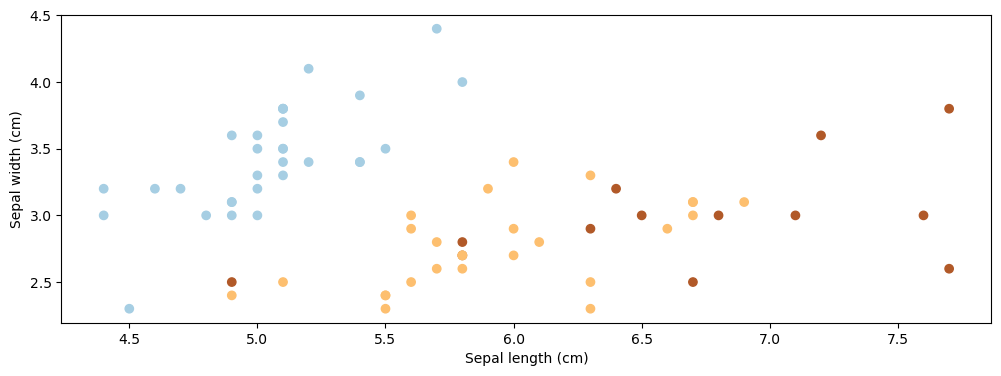

In [2]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# Visualize the Iris flower dataset
setosa_flowers = (iris.target == 0)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")

# Review: Machine Learning Models

A machine learning model is a function
$$ f : \mathcal{X} \to \mathcal{Y} $$
that maps inputs $x \in \mathcal{X}$ to targets $y \in \mathcal{Y}$.

Below, we fit a Softmax model to the Iris dataset.

In [3]:
from sklearn.linear_model import LogisticRegression
# fit a softmax regression model (implemented in LogisticRegression in sklearn)
model = LogisticRegression()
model.fit(X,y)
y_pred = model.predict(X_holdout)

# Classification Accuracy

The simplest and most natural metric for classification algorithms on a dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$ is accuracy:
$$\text{acc}(f) = \frac{1}{n}\sum_{i=1}^n \mathbb{I}\{f(x^{(i)}) = y^{(i)}\},$$
where $\mathbb{I}\{\cdot\}$ is an indicator function (equals 1 if its input is true and zero otherwise).

In [4]:
accuracy = (y_pred == y_holdout).mean()
print('Iris test set accuracy: %.2f' % accuracy)

Iris test set accuracy: 0.84


# Confusion Matrix

We can better understand classification error via a confusion matrix.
* On the y-axis we have the true classes $y_j$.
* On the x-axis we have the predicted classes $\hat y_k$.
* The cell for $(y_j, \hat y_k)$ contains the number of samples of class $y_j$ that have been classified as $\hat y_k$.

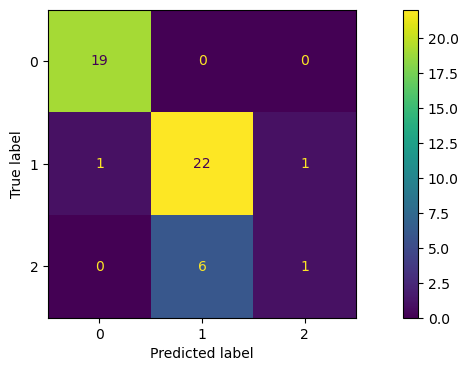

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the predictions
y_pred = model.predict(X_holdout)

# Compute the confusion matrix
cm = confusion_matrix(y_holdout, y_pred)

# Display using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


Accuracy is a problematic metric when classes are imbalanced. 

It easy to achieve high accuracy just by being accurate on the more frequent class (by always predicting it, for example).

# Metrics for Binary Classification

We can look at performance in a more precise way when we do binary classification. Consider the following confusion matrix.

$ $                   | Predicted positive $\hat y=1$ | Predicted negative $\hat y=0$
---------------------|--------------------------------|------------------------------
Positive class $y=1$ | True positive (TP)             | False negative (FN)
Negative class $y=0$ | False positive (FP)            | True negative (TN)

We can define accuracy as follows:

$$\text{accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{FN} + \text{TN}}$$

This is the number of correct predictions divided by the total number of predictions.

# Sensitivity and Specificity

$ $                   | Predicted positive $\hat y=1$ | Predicted negative $\hat y=0$
---------------------|--------------------------------|------------------------------
Positive class $y=1$ | True positive (TP)             | False negative (FN)
Negative class $y=0$ | False positive (FP)            | True negative (TN)

We can also look at "accuracy" on each class separately. This reveals problems with imbalanced classes.
\begin{align*}
\underset{\text{(recall, true positive rate)}}{\text{sensitivity}} & = \frac{\text{TP}}{\text{positive class}}  = \frac{\text{TP}}{\text{TP} + \text{FN}} \\
\underset{\text{(true negative rate)}}{\text{specificity}} & = \frac{\text{TN}}{\text{negative class}} = \frac{\text{TN}}{\text{TN} + \text{FP}} \\
\end{align*}

We can combine these into a single measure called balanced accuracy

\begin{align*}
\text{balanced accuracy} & = \frac{1}{2}\left(\text{specificity} + \text{sensitivity}\right) \\
& = \frac{1}{2}\left(\frac{\text{TN}}{\text{TN} + \text{FP}} + \frac{\text{TP}}{\text{TP} + \text{FN}}\right)
\end{align*} 

# Precision and Recall

$ $                   | Predicted positive $\hat y=1$ | Predicted negative $\hat y=0$
---------------------|--------------------------------|------------------------------
Positive class $y=1$ | True positive (TP)             | False negative (FN)
Negative class $y=0$ | False positive (FP)            | True negative (TN)

An alternative set of measures is precision and recall.
\begin{align*}
\underset{\text{(positive predictive value)}}{\text{precision}} & = \frac{\text{TP}}{\text{predicted positive}} = \frac{\text{TP}}{\text{TP} + \text{FP}} \\
\underset{\text{(sensitivity, true positive rate)}}{\text{recall}} & = \frac{\text{TP}}{\text{positive class}}  = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{align*}

Imagine we are building a search engine. The positive examples are the pages that are relevant to the users.
* Precision: of the web pages returned by the engine, how many were truly relevant?
* Recall: how many relevant pages did we find?

Notice that we don't directly report performance on negatives (what % of irrelevant pages were labeled as such).

When do we choose precision and recall vs. sensitivity and specificity?
* Precision and recall are useful if we don't care about true negatives (e.g. a search engine). We only care about identifying correct positives and not missing any.

* Sensitivity and specificity are useful if negatives are also important (e.g., accurately detecting absence of cancer is also important).

# F-Score

The F-Score is the harmonic mean of precision and recall.
$$\text{F-Score} = \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}}$$

It equals one at prefect prediction and recall and zero if one of precision or recall is zero.

<left><img width=25% src="img/gw_monogram_2c.png"></left>

# Part 3: Advanced Classification Metrics

Next, we look a few more advanced classification metrics.

# Review: Classification

Consider a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We distinguish between two types of supervised learning problems depnding on the targets $y^{(i)}$. 

1. __Regression__: The target variable $y \in \mathcal{Y}$ is continuous:  $\mathcal{Y} \subseteq \mathbb{R}$.
2. __Classification__: The target variable $y$ is discrete, and takes on one of $K$ possible values.

When classification labels take $K=2$ values, we perform __binary classification__.

# Review: Sensitivity and Specificity

$ $                   | Predicted positive $\hat y=1$ | Predicted negative $\hat y=0$
---------------------|--------------------------------|------------------------------
Positive class $y=1$ | True positive (TP)             | False negative (FN)
Negative class $y=0$ | False positive (FP)            | True negative (TN)

We can also look at "accuracy" on each class separately. This reveals problems with imbalanced classes.
\begin{align*}
\underset{\text{(recall, true positive rate)}}{\text{sensitivity}} & = \frac{\text{TP}}{\text{positive class}}  = \frac{\text{TP}}{\text{TP} + \text{FN}} \\
\underset{\text{(true negative rate)}}{\text{specificity}} & = \frac{\text{TN}}{\text{negative class}} = \frac{\text{TN}}{\text{TN} + \text{FP}} \\
\end{align*}

# Trading Off Sensitivity vs. Specificity

Suppose that true positives are more important than true negatives.
* We may output the positive class only on very confident examples.
* This will increase performance on positive examples and decrease performance on negative examples.

Most classifiers come with confidence scores that make this easy to do.

With our softmax model, we can simpliy obtain the class probabilities.

The default threshold for predicting class 1 in binary classification is when it has >50\% probability. But we can set it higher or lower.

In [6]:
pred_probabilities = model.predict_proba(X_holdout)
print('Predicted probabilities of class 0 from the model:')
print(pred_probabilities[:10,0])

Predicted probabilities of class 0 from the model:
[0.90500627 0.1628024  0.26248388 0.91899931 0.05452794 0.98241773
 0.90444375 0.87543531 0.83226506 0.12415388]


# Receiver Operating Characteristic (ROC)

In binary classification, the Receiver Operating Characteristic (ROC) curve plots the true positive rate and the false positive rate (FPR) as we vary the threshold for labeling a positive example.

\begin{align*}
\text{TPR} = \underset{\text{(recall, sensitivity)}}{\text{true positive rate}} & = \frac{\text{TP}}{\text{positive class}}  = \frac{\text{TP}}{\text{TP} + \text{FN}} \\
\text{FPR} = 1-\underset{\text{(true negative rate)}}{\text{specificity}} & = 1 - \frac{\text{TN}}{\text{negative class}} = \frac{\text{FP}}{\text{TN} + \text{FP}} \\
\end{align*}

Suppose we want to improve sensitivity for Class 2 on the Iris dataset.
We first compute the probability $p(y=2|x)$ for each input $x$. For any threshold $t>0$, we label $x$ as Class 2 if $p(y=2|x)>t$. 
* Small $t$ result in a high TPR (we identify all positives) and high FPR (many are false).
* High $t$ result in a low TPR (we identify few positives) and low FPR (we only label the most confident inputs).

Below, the ROC curve measures the TPR and FPR as we vary $t$.

In [7]:
from sklearn.metrics import roc_curve

class2_scores = pred_probabilities[:,2] # we take class 2 as the "positive" class
# create labels where class 2 is the "positive" class
class2_y = np.zeros(y_holdout.shape)
class2_y[y_holdout==2] = 1
print('First class 2 scores: ', class2_scores[:4])
fpr, tpr, thresholds = roc_curve(class2_y, class2_scores)

First class 2 scores:  [0.02495207 0.15064683 0.17470687 0.00545101]


We can visualize the TPR vs. the FPR at various thresholds.

Text(0.5, 1.0, 'Receiver operating characteristic')

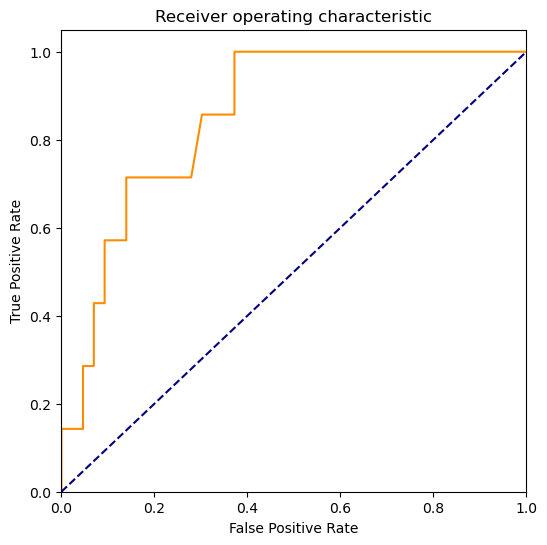

In [8]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

We highlight the following properties of the ROC curve:
* In the bottom left corner, we predict only negatives. TPR = FPR = 0.
* In the top right corner, we predict only positives. TPR = FPR = 1.
* The ideal classifier is in the top left: TPR = 1, FPR = 0.
* The blue diagonal corresponds to randomly guessing "positive" with $p = \text{TPR}$.
* The ROC curve lies between ideal and random.

# Area Under the Curve

We can use the area under the curve (AUC) as a single measure of classifier performance.
* The ideal classifier (ROC curve reaches top left corner) has an AUC-ROC of one.
* A random classifier (diagonal dashed line) has an AUC-ROC of 0.5.

We may compute the AUC of the above ROC curve as follows.

In [9]:
from sklearn.metrics import auc
print('AUC-ROC: %.4f' % auc(fpr, tpr))

AUC-ROC: 0.8555


# Multi-Class Generalizations

We can also define sensitivity, specificity, and other metrics for each class in multi-class classification.
* We define each class in turn to be "positive" ($y=1$) and all other classes as negative ($y=0$).
* We compute sensitivity and specificity for each "positive" class using the usual formulas.

In multi-class settings, we average binary metrics in various ways:
* `macro`: We average binary one-vs-all metrics for each class.
$$\text{precision}_\text{macro} = \frac{1}{K} \sum_{k=1}^K \frac{\text{TP}_k}{\text{TP}_k + \text{FP}_k}$$
* `micro`: We average binary metrics across classes.
$$\text{precision}_\text{micro} = \frac{\sum_{k=1}^K \text{TP}_k}{\sum_{k=1}^K (\text{TP}_k + \text{FP}_k)}$$

See the `scikit-learn` [guide](https://scikit-learn.org/stable/modules/model_evaluation.html) for more on model evaluation.

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_holdout, y_pred, target_names=['Setosa', 'Versicolor', 'Virginica']))

              precision    recall  f1-score   support

      Setosa       0.95      1.00      0.97        19
  Versicolor       0.79      0.92      0.85        24
   Virginica       0.50      0.14      0.22         7

    accuracy                           0.84        50
   macro avg       0.75      0.69      0.68        50
weighted avg       0.81      0.84      0.81        50



<left><img width=25% src="img/gw_monogram_2c.png"></left>
# Part 4: Evaluating Regression Models

The first step towards building better ML models is to determine how to *evaluate* them.

Next, we look at regression models.

# Review: Regression

Consider a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We distinguish between two types of supervised learning problems depnding on the targets $y^{(i)}$. 

1. __Regression__: The target variable $y \in \mathcal{Y}$ is continuous:  $\mathcal{Y} \subseteq \mathbb{R}$.
2. __Classification__: The target variable $y$ is discrete, and takes on one of $K$ possible values.

# Review: Machine Learning Models

A machine learning model is a function
$$ f : \mathcal{X} \to \mathcal{Y} $$
that maps inputs $x \in \mathcal{X}$ to targets $y \in \mathcal{Y}$.

# Regression Losses

Most standard regression losses can be used as evaluation metrics.
* Mean squared error: $$\frac{1}{2n} \sum_{i=1}^n \left( f(x^{(i)}) - y^{(i)} \right)^2$$
* Absolute (L1) error: $$\frac{1}{n} \sum_{i=1}^n \left| f(x^{(i)}) - y^{(i)} \right|$$

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y1 = np.array([1, 2, 3, 4])
y2 = np.array([-1, 1, 3, 5])

print('Mean squared error: %.2f' % mean_squared_error(y1, y2))
print('Mean absolute error: %.2f' % mean_absolute_error(y1, y2))

Mean squared error: 1.50
Mean absolute error: 1.00


These metrics have a number of limitations:
* They do not take the scale of the input into account. The same magnitude of the error has different implications depending on whether $y^{(i)} = 100$ or $y^{(i)} = 10$.
* They are not easily interpretable. It's unclear if an L1 error of 10 is very good or very bad.

# Scaled Losses

To account for differences in scale, we may work with *scaled* losses:
* Mean absolute percent error (MAPE):
$$\frac{1}{n} \sum_{i=1}^n \frac{\left| f(x^{(i)}) - y^{(i)} \right|}{|y^{(i)}|}$$
* Symmetric mean absolute percent error (SMAPE):
$$\frac{1}{n} \sum_{i=1}^n \frac{\left| f(x^{(i)}) - y^{(i)} \right|}{\left(|y^{(i)}| + |f(x^{(i)})|\right)/2}$$

The SMAPE allows either $y^{(i)}$ or $f(x^{(i)})$ to be small (or zero).

# Scaled Logarithmic Losses

Another way to account for error in $f(x^{(i)})$ relative to $y^{(i)}$ is by taking the log of both values. This puts them on the same scale.
$$\frac{1}{n} \sum_{i=1}^n \left| \log(1 + y^{(i)}) - \log(1 + f(x^{(i)})) \right|$$
This is called the mean absolute logarithmic error (MALE).

# The Coefficient of Determination

The coefficient of determination, usually denoted by $R^2$, measures the accuracy of the predictions, relative to constantly predicting the average $\bar y = \frac{1}{n}\sum_{i=1}^n y^{(i)}$:
$$R^2 = 1 - \left(\frac{\sum_{i=1}^n \left( f(x^{(i)}) - y^{(i)} \right)^2}{\sum_{i=1}^n \left( \bar y - y^{(i)} \right)^2}\right).$$

An $R^2$ of one corresponds to perfect accuracy. An $R^2$ of zero means that $f$ is not better than the average prediction.